# Summer Olympic Analysis

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Loading Data

In [30]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Summer Olympic medals.csv', encoding='ISO-8859-1')
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


## Data Preparation and Cleaning

In [31]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [32]:
df.nunique()

City                9
Year                9
Sport              28
Discipline         41
Event             293
Athlete         11337
Gender              2
Country_Code      128
Country           127
Event_gender        3
Medal               3
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


### Handling Duplicates and missing values

In [34]:
df.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [35]:
df = df.dropna(how = 'all')

In [36]:
df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(1)

In [38]:
df = df.drop_duplicates()

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df = df.astype({'Year':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15315 non-null  object
 1   Year          15315 non-null  int64 
 2   Sport         15315 non-null  object
 3   Discipline    15315 non-null  object
 4   Event         15315 non-null  object
 5   Athlete       15315 non-null  object
 6   Gender        15315 non-null  object
 7   Country_Code  15315 non-null  object
 8   Country       15315 non-null  object
 9   Event_gender  15315 non-null  object
 10  Medal         15315 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


## Data Exploration

### Medals by country

In [12]:
con_medal = df.groupby('Country')['Medal'].count()
con_medal

Country
Afghanistan          1
Algeria             14
Argentina          153
Armenia              9
Australia          798
                  ... 
Virgin Islands*      1
West Germany       345
Yugoslavia         278
Zambia               2
Zimbabwe            23
Name: Medal, Length: 127, dtype: int64

### top 10 countries by medals

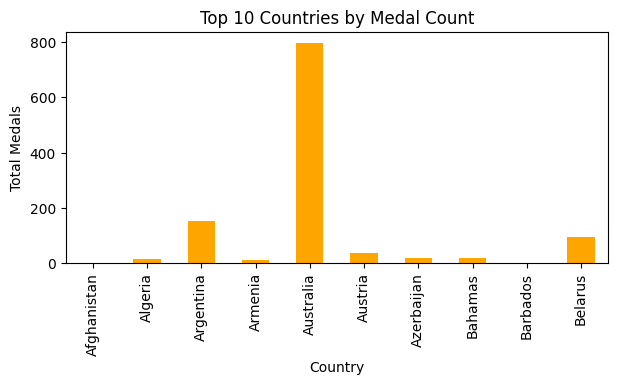

In [25]:
plt.figure(figsize=(7, 3))
con_medal.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

### Medals Won Over the Years

In [14]:
year_medal = df.groupby('Year')['Medal'].count()
year_medal

Year
1976.0    1305
1980.0    1386
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: Medal, dtype: int64

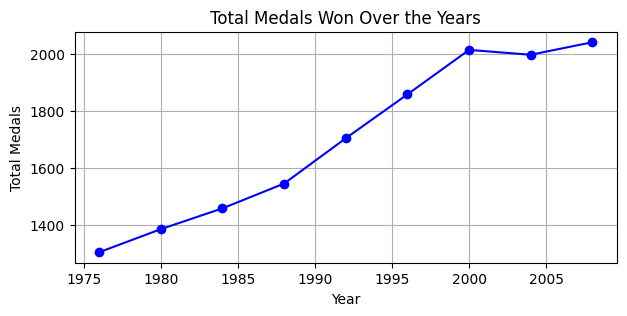

In [24]:
plt.figure(figsize=(7, 3))
plt.plot(year_medal.index, year_medal.values,marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

### Gender distribution in events

In [48]:
gn = df['Gender'].value_counts()
gn

Gender
Men      9388
Women    5928
Name: count, dtype: int64

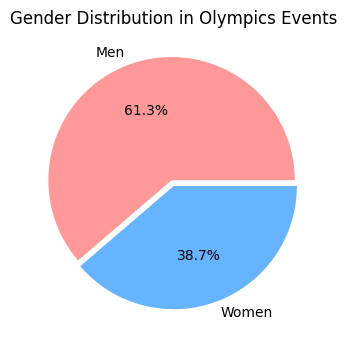

In [46]:
plt.figure(figsize=(6, 4))
gn.plot(kind='pie', autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

### Top Athletes with Most Medals

In [27]:
at = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
at

Athlete
PHELPS, Michael        16
ANDRIANOV, Nikolay     12
FISCHER, Birgit        12
NEMOV, Alexei          12
THOMPSON, Jenny        12
                       ..
ZVONAREVA, Vera         1
ZVYAGINTSEV, Viktor     1
ZWEHL, Julia            1
ZWERING, Klaas-Erik     1
ZUEVA, Natalia          1
Name: Medal, Length: 11337, dtype: int64

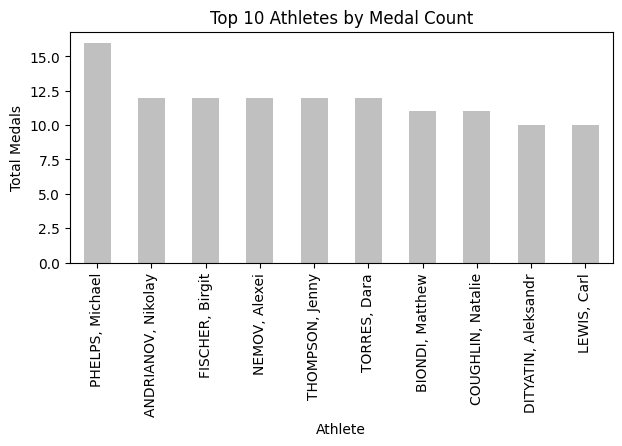

In [28]:
plt.figure(figsize=(7, 3))
at.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

### Predictive Analysis

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Encode categorical variables using LabelEncoder

In [16]:
le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country_Code'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Event_gender'] =le.fit_transform(df['Event_gender'])
df['Medal'] = df['Medal'].map({'Gold': 1,'Silver': 1, 'Bronze': 1})

### Features and target

In [17]:
X = df[['Country_Code', 'Sport', 'Gender','Event_gender']]
y = df['Medal']

### Split the dataset into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

### Initialize and train a logistic regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

### Predict on the test data

In [ ]:
y_pred = model.predict(X_test)

### Model evaluation

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,
y_pred))

# Insights:

1.Australia emerged as the top-performing country in this timeframe, securing the most medals overallfollowed by Argentina.

2.The 2008 Summer Olympics recorded the highest number of medals won, indicating a significant level of competition and participation during that year.

3.Across the analyzed period, male athletes won more medals compared to female athletes, reflecting a notable gender disparity in the competitions.

4.Michael Phelps stood out as the most successful athlete, dominating the medal tally with his extraordinary performances.